Dataset Loaded ✅ (1470, 35)

=== DAY 4 : MATPLOTLIB VISUALIZATION ===


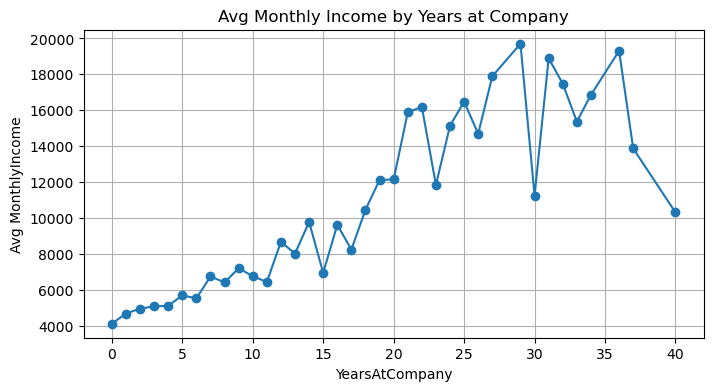

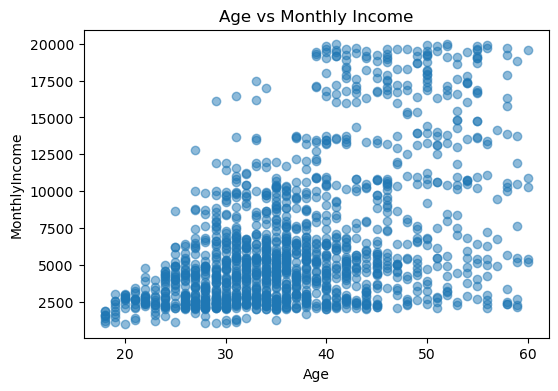

<Figure size 600x400 with 0 Axes>

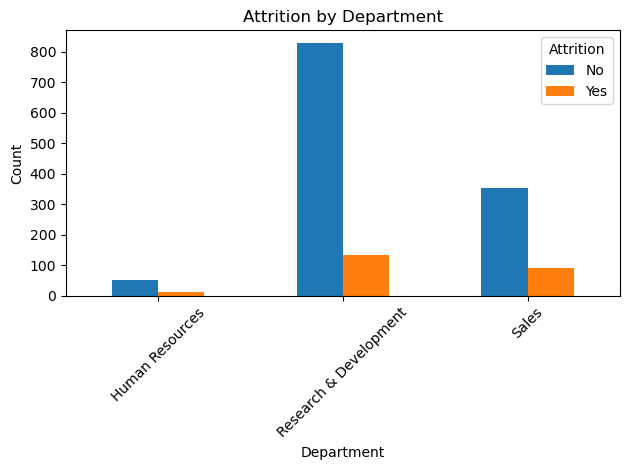

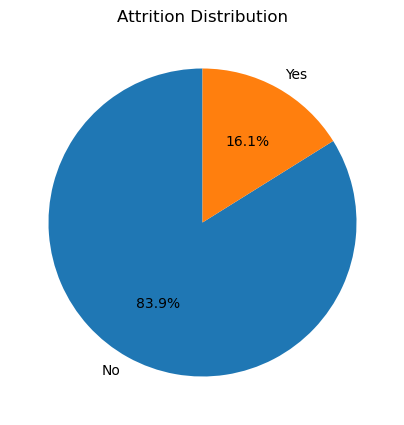

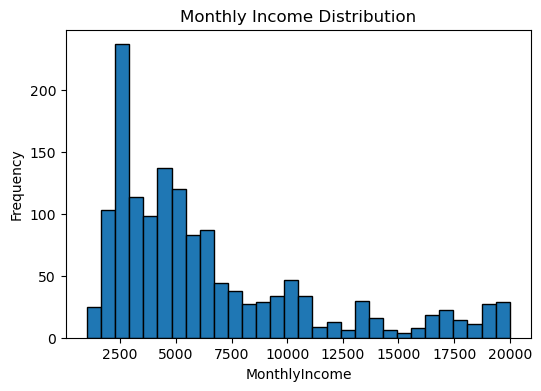

<Figure size 600x400 with 0 Axes>

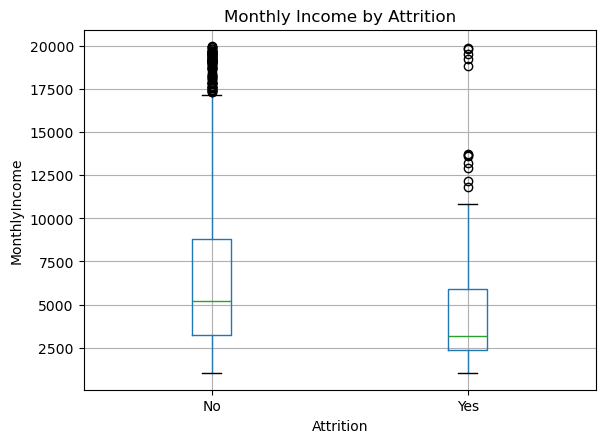

Day 4 ✅ Completed

=== DAY 5 : SEABORN & PLOTLY VISUALS ===


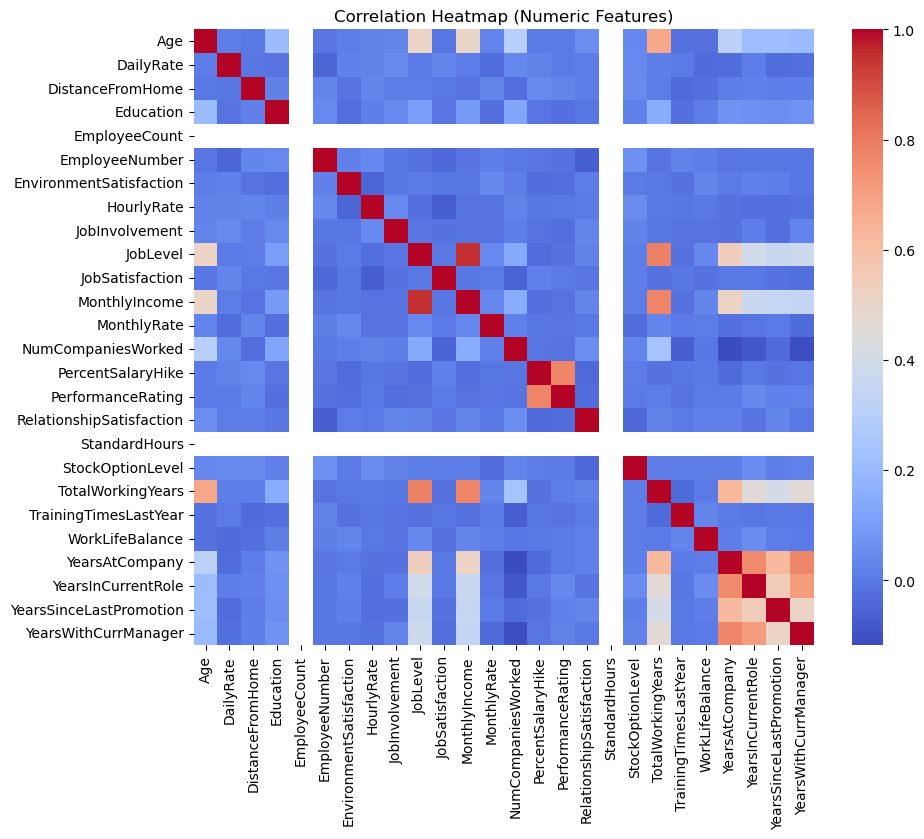

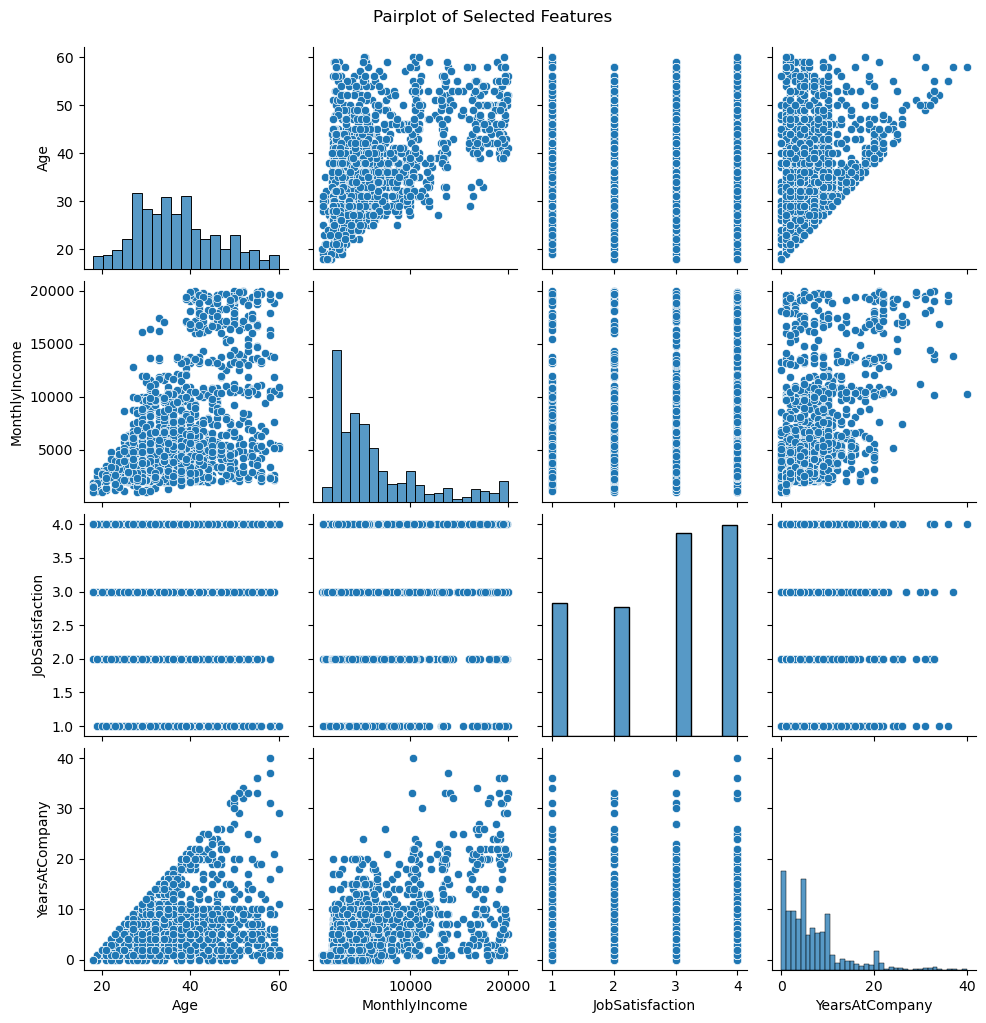

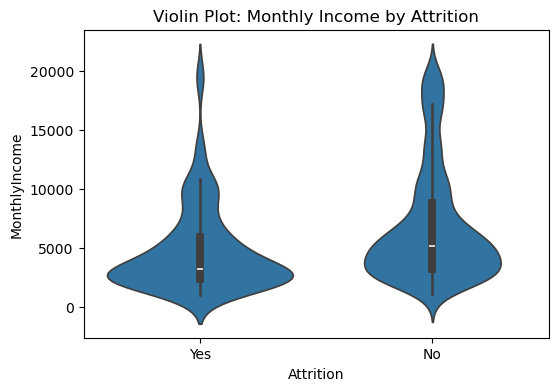

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 21.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 84.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 57.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


In [ ]:
# ============================================================
# Combined Project Notebook : Day 4 to Day 9
# Dataset  : HR-Employee-Attrition.csv
# ============================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import requests
from bs4 import BeautifulSoup

# ------------------ Load Dataset ----------------------------
df = pd.read_csv("HR-Employee-Attrition.csv")
print("Dataset Loaded ✅", df.shape)

# ============================================================
# Day 4 – Matplotlib Visualization
# ============================================================

print("\n=== DAY 4 : MATPLOTLIB VISUALIZATION ===")

# Line chart – Average MonthlyIncome by YearsAtCompany
plt.figure(figsize=(8,4))
income_by_year = df.groupby("YearsAtCompany")["MonthlyIncome"].mean()
plt.plot(income_by_year.index, income_by_year.values, marker="o")
plt.title("Avg Monthly Income by Years at Company")
plt.xlabel("YearsAtCompany")
plt.ylabel("Avg MonthlyIncome")
plt.grid(True)
plt.show()

# Scatter plot – Age vs MonthlyIncome
plt.figure(figsize=(6,4))
plt.scatter(df["Age"], df["MonthlyIncome"], alpha=0.5)
plt.title("Age vs Monthly Income")
plt.xlabel("Age")
plt.ylabel("MonthlyIncome")
plt.show()

# Bar chart – Attrition count by Department
plt.figure(figsize=(6,4))
dept_attr = df.groupby("Department")["Attrition"].value_counts().unstack()
dept_attr.plot(kind="bar")
plt.title("Attrition by Department")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Pie chart – Attrition Yes/No
plt.figure(figsize=(5,5))
df["Attrition"].value_counts().plot(
    kind="pie", autopct="%1.1f%%", startangle=90
)
plt.title("Attrition Distribution")
plt.ylabel("")
plt.show()

# Histogram – MonthlyIncome distribution
plt.figure(figsize=(6,4))
plt.hist(df["MonthlyIncome"], bins=30, edgecolor="black")
plt.title("Monthly Income Distribution")
plt.xlabel("MonthlyIncome")
plt.ylabel("Frequency")
plt.show()

# Box plot – MonthlyIncome by Attrition
plt.figure(figsize=(6,4))
df.boxplot(column="MonthlyIncome", by="Attrition")
plt.title("Monthly Income by Attrition")
plt.suptitle("")
plt.xlabel("Attrition")
plt.ylabel("MonthlyIncome")
plt.show()

print("Day 4 ✅ Completed\n")

# ============================================================
# Day 5 – Seaborn & Plotly Advanced Visualization
# ============================================================

print("=== DAY 5 : SEABORN & PLOTLY VISUALS ===")

# Correlation Heatmap (numeric columns)
plt.figure(figsize=(10,8))
numeric_cols = df.select_dtypes(include=[np.number])
corr = numeric_cols.corr()
sns.heatmap(corr, cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()

# Pairplot – sample of columns (reduce for speed)
sns.pairplot(df[["Age", "MonthlyIncome", "JobSatisfaction", "YearsAtCompany"]])
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show()

# Violin plot – MonthlyIncome by Attrition
plt.figure(figsize=(6,4))
sns.violinplot(data=df, x="Attrition", y="MonthlyIncome")
plt.title("Violin Plot: Monthly Income by Attrition")
plt.show()

# Swarm plot – JobSatisfaction by Attrition
plt.figure(figsize=(6,4))
sns.swarmplot(data=df, x="Attrition", y="JobSatisfaction")
plt.title("Swarm Plot: Job Satisfaction by Attrition")
plt.show()

# ---------- Plotly Interactive Charts (works in notebook/HTML) ----------
# Scatter – Age vs MonthlyIncome coloured by Attrition
fig_scatter = px.scatter(
    df, x="Age", y="MonthlyIncome",
    color="Attrition", title="Age vs Monthly Income (Interactive)"
)
fig_scatter.show()

# Bar – Average income by Department (interactive)
dept_income = df.groupby("Department")["MonthlyIncome"].mean().reset_index()
fig_bar = px.bar(
    dept_income, x="Department", y="MonthlyIncome",
    title="Avg Monthly Income by Department"
)
fig_bar.show()

# Line – YearsAtCompany vs Average income (interactive)
years_income = df.groupby("YearsAtCompany")["MonthlyIncome"].mean().reset_index()
fig_line = px.line(
    years_income, x="YearsAtCompany", y="MonthlyIncome",
    title="Avg Monthly Income vs YearsAtCompany"
)
fig_line.show()

print("Day 5 ✅ Completed\n")

# ============================================================
# Day 6 – Data Cleaning & Statistics
# ============================================================

print("=== DAY 6 : DATA CLEANING & STATS ===")

# Duplicates
dup_count = df.duplicated().sum()
print("Duplicate rows before removal :", dup_count)
df = df.drop_duplicates()
print("Shape after duplicate removal :", df.shape)

# Missing data check
print("\nMissing values per column:")
print(df.isna().sum())

# Example handling – fill MonthlyIncome NA with median; JobSatisfaction with mode
if df["MonthlyIncome"].isna().sum() > 0:
    df["MonthlyIncome"].fillna(df["MonthlyIncome"].median(), inplace=True)

if df["JobSatisfaction"].isna().sum() > 0:
    df["JobSatisfaction"].fillna(df["JobSatisfaction"].mode()[0], inplace=True)

# Basic statistics
num_cols = ["Age", "MonthlyIncome", "YearsAtCompany", "JobSatisfaction"]
stats = df[num_cols].agg(["mean", "median", "std", "var"])
print("\nBasic statistics for key numeric columns:")
print(stats)

# Groupby categories – Example: Department
dept_summary = df.groupby("Department")["MonthlyIncome"].agg(
    ["count", "mean", "min", "max"]
)
print("\nDepartment-wise MonthlyIncome Summary:")
print(dept_summary)

# Another groupby – Attrition rate by Department
attr_rate = (
    df.groupby("Department")["Attrition"]
    .apply(lambda x: (x == "Yes").mean())
    .rename("AttritionRate")
)
print("\nAttrition Rate by Department:")
print(attr_rate)

print("\nDay 6 ✅ Completed\n")

# ============================================================
# Day 7 – Introduction to Web Scraping & AI (Basic Demo)
# ============================================================

print("=== DAY 7 : SIMPLE WEB SCRAPING DEMO ===")

# Simple web scraping demo from example.com
url = "https://example.com"
response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")

# Extract all paragraph texts
paragraphs = [p.get_text(strip=True) for p in soup.find_all("p")]

scraped_df = pd.DataFrame({"info_text": paragraphs})
print("Scraped DataFrame (sample):")
print(scraped_df.head())

# Example: integrate scraped info count as a dummy feature
scraped_df["text_length"] = scraped_df["info_text"].str.len()

# For demo, take average text_length and add as constant feature to HR dataset
avg_len = scraped_df["text_length"].mean() if not scraped_df.empty else 0
df["ExternalInfoScore"] = avg_len
print("\nAdded 'ExternalInfoScore' column to HR dataset (same value for all rows).")

print("Day 7 ✅ Completed\n")

# ============================================================
# Day 8 – BeautifulSoup Web Scraping (Table/Links demo)
# ============================================================

print("=== DAY 8 : ADVANCED SCRAPING DEMO ===")

# Example: extract all links from same page and convert to DataFrame
links = [(a.get_text(strip=True), a.get("href")) for a in soup.find_all("a")]

links_df = pd.DataFrame(links, columns=["link_text", "href"])
print("Links DataFrame sample:")
print(links_df.head())

# Clean – drop rows with no href
links_df = links_df.dropna(subset=["href"])

# Merge example: just create a dummy key and join to first N employees
links_df["key"] = 0
df["key"] = 0
merged_hr_links = pd.merge(df.head(len(links_df)), links_df, on="key", how="left")
merged_hr_links.drop(columns=["key"], inplace=True)

print("\nMerged HR + Links sample:")
print(merged_hr_links.head())

print("Day 8 ✅ Completed\n")

# ============================================================
# Day 9 – Final Integration & Summary
# ============================================================

print("=== DAY 9 : FINAL INTEGRATION & SUMMARY ===")

# Final cleaned dataset (take current df as final)
final_df = df.copy()

print("\nFinal dataset shape :", final_df.shape)
print("\nFinal dataset columns :")
print(final_df.columns)

print("\nFinal dataset info:")
print(final_df.info())

print("\nSample rows from final_df:")
print(final_df.head())

# Simple insight examples
print("\n--- INSIGHT 1 : Overall Attrition Rate ---")
overall_attrition = (final_df["Attrition"] == "Yes").mean()
print(f"Overall attrition rate: {overall_attrition:.2%}")

print("\n--- INSIGHT 2 : Highest paying Department ---")
dept_income_sorted = dept_summary["mean"].sort_values(ascending=False)
print(dept_income_sorted)

print("\n--- INSIGHT 3 : Department with highest attrition ---")
print(attr_rate.sort_values(ascending=False))

print("\n✅ Day 4 to Day 9 combined notebook completed.")
print("Use this notebook as base for README + final report.")
